# Activity 2.2 : Training Neural Networks
**Name:** Emmanuel Abo


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [66]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv('/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Datasets/pima-indians-diabetes.csv', names=names)
diabetes_df

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Check the top 5 samples of the data

In [69]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
220,0,177,60,29,478,34.6,1.072,21,1
630,7,114,64,0,0,27.4,0.732,34,1
588,3,176,86,27,156,33.3,1.154,52,1
194,8,85,55,20,0,24.4,0.136,42,0
545,8,186,90,35,225,34.5,0.423,37,1


In [70]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [71]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [73]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [74]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [75]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [76]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                108       
                                                                 
 dense_17 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [77]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 2s 33ms/step - loss: 0.8768 - accuracy: 0.3507 - val_loss: 0.8490 - val_accuracy: 0.3802
Epoch 2/200
18/18 [==============================] - 0s 21ms/step - loss: 0.8354 - accuracy: 0.3733 - val_loss: 0.8156 - val_accuracy: 0.3906
Epoch 3/200
18/18 [==============================] - 0s 18ms/step - loss: 0.8022 - accuracy: 0.3872 - val_loss: 0.7883 - val_accuracy: 0.4115
Epoch 4/200
18/18 [==============================] - 0s 9ms/step - loss: 0.7751 - accuracy: 0.4306 - val_loss: 0.7658 - val_accuracy: 0.4635
Epoch 5/200
18/18 [==============================] - 0s 19ms/step - loss: 0.7526 - accuracy: 0.4618 - val_loss: 0.7469 - val_accuracy: 0.4896
Epoch 6/200
18/18 [==============================] - 0s 26ms/step - loss: 0.7337 - accuracy: 0.4948 - val_loss: 0.7308 - val_accuracy: 0.5208
Epoch 7/200
18/18 [==============================] - 0s 28ms/step - loss: 0.7177 - accuracy: 0.5243 - val_loss: 0.7168 - val_accuracy: 0.5365
Epoch 8

In [78]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [79]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [80]:
y_pred_prob_nn_1[:10]

array([[0.54465663],
       [0.6431217 ],
       [0.34058258],
       [0.33042538],
       [0.17843525],
       [0.53127724],
       [0.03436035],
       [0.37832227],
       [0.90421754],
       [0.17144935]], dtype=float32)

Create the plot_roc function

In [156]:
def plot_roc(y_test, y_pred, model_name, titles):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title=titles.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


Evaluate the model performance and plot the ROC CURVE

accuracy is 0.771
roc-auc is 0.831


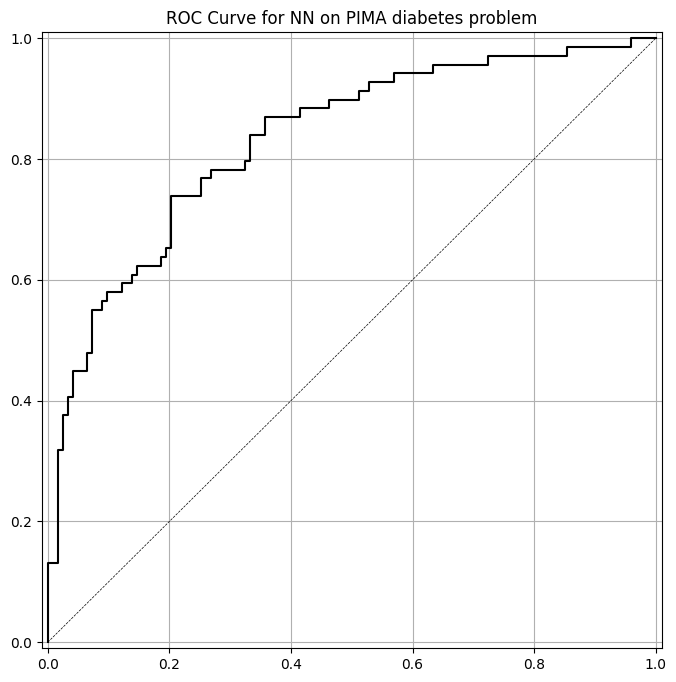

In [82]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [83]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

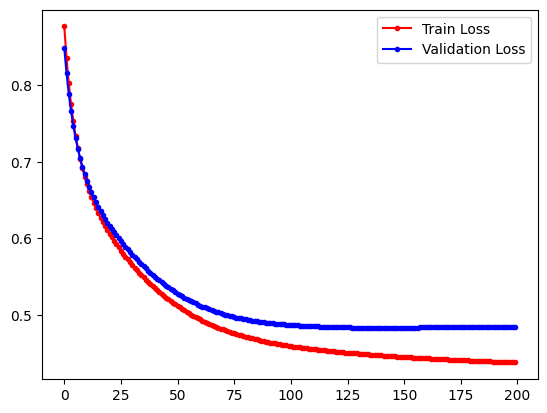

In [84]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

> The graph above shows that the validation loss is greater than the training loss as the epoch increases which indicates that the model is overfitting. This means that the model performs well on training data but poorly on new data in the validation set. It lost the ability to generalize new or unseen data because the training loss continues to decrease while the validation loss stopped decreasing.

# Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epochs and network structures
* Interpret your result

In [198]:
apple_df = pd.read_csv('/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Datasets/apple_quality.csv')
apple_df.drop(4000, axis=0, inplace=True)
apple_df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [199]:
apple_df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [200]:
apple_df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [201]:
apple_df['Quality'] = apple_df['Quality'].replace({'good': 1, 'bad': 0})
apple_df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


In [202]:
apple_df['Quality'] = apple_df['Quality'].astype(float)
apple_df['Acidity'] = apple_df['Acidity'].astype(float)
apple_df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality        float64
dtype: object

In [203]:
X = apple_df.iloc[:, :-1].values
y = apple_df["Quality"].values

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1111)

In [205]:
np.mean(y), np.mean(1-y)

(0.501, 0.499)

In [206]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

### **Build a model with two hidden layers, each with 6 nodes and use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer**

In [207]:
model_2  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])
model_2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 6)                 54        
                                                                 
 dense_58 (Dense)            (None, 6)                 42        
                                                                 
 dense_59 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Use a learning rate of .003 and train for 1500 epochs**

In [208]:
model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
94/94 [==============================] - 1s 4ms/step - loss: 0.6901 - accuracy: 0.5520 - val_loss: 0.6821 - val_accuracy: 0.5570
Epoch 2/1500
94/94 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5763 - val_loss: 0.6722 - val_accuracy: 0.5900
Epoch 3/1500
94/94 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.5997 - val_loss: 0.6635 - val_accuracy: 0.6130
Epoch 4/1500
94/94 [==============================] - 0s 3ms/step - loss: 0.6551 - accuracy: 0.6293 - val_loss: 0.6539 - val_accuracy: 0.6250
Epoch 5/1500
94/94 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.6467 - val_loss: 0.6427 - val_accuracy: 0.6480
Epoch 6/1500
94/94 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6640 - val_loss: 0.6304 - val_accuracy: 0.6590
Epoch 7/1500
94/94 [==============================] - 0s 3ms/step - loss: 0.6195 - accuracy: 0.6703 - val_loss: 0.6181 - val_accuracy: 0.6690
Epoch 

In [209]:
y_pred_class_nn_2 = (model_2.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_2 = model_2.predict(X_test_norm)

32/32 [==============================] - 0s 1ms/step


In [210]:
y_pred_class_nn_2[:10]

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1]], dtype=int32)

In [211]:
y_pred_prob_nn_2[:10]

array([[0.64674294],
       [0.99973655],
       [0.14202291],
       [0.8234791 ],
       [0.01273154],
       [0.8563169 ],
       [0.9710051 ],
       [0.39515117],
       [0.07437319],
       [0.9530569 ]], dtype=float32)

### **Graph the trajectory of the loss functions, accuracy on both train and test set**

<Figure size 1200x800 with 0 Axes>

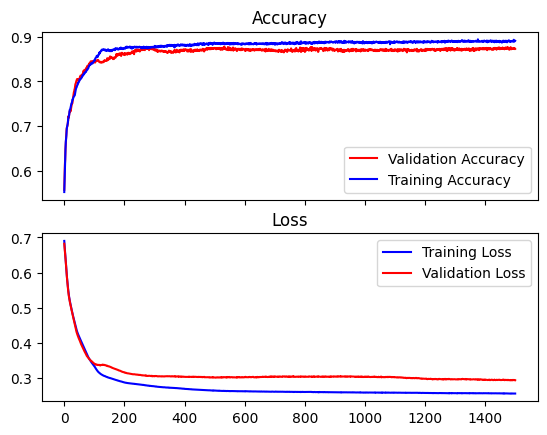

In [212]:
plt.figure(figsize=(12, 8))

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(run_hist_2.history["val_accuracy"],'r', label="Validation Accuracy")
ax[0].plot(run_hist_2.history["accuracy"],'b', label="Training Accuracy")
ax[0].set_title("Accuracy")

ax[1].plot(run_hist_2.history["loss"],'b', label="Training Loss")
ax[1].plot(run_hist_2.history["val_loss"],'r', label="Validation Loss")
ax[1].set_title("Loss")

ax[0].legend()
ax[1].legend()

### **Plot the roc curve for the predictions**

accuracy is 0.873
roc-auc is 0.949


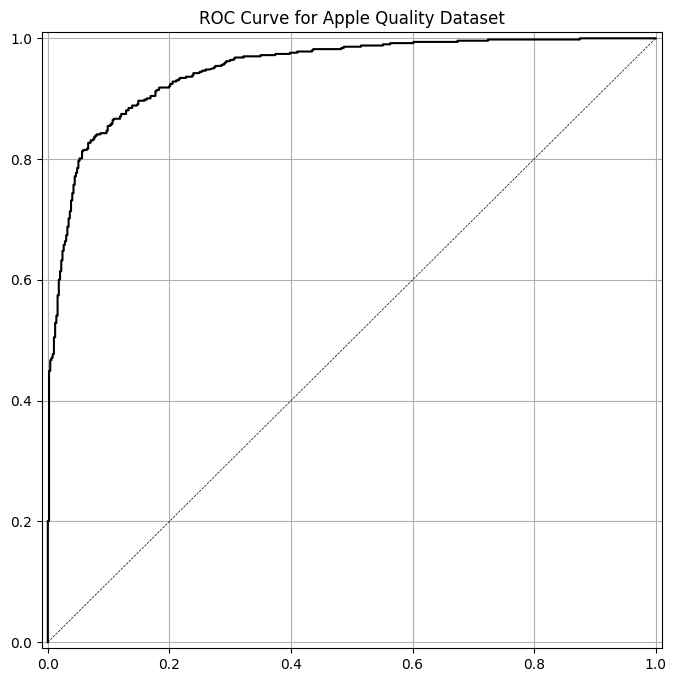

In [213]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN', "ROC Curve for Apple Quality Dataset")

> The result yielded an accuracy score of 87% so I need to try and increase it by changing the amount of neurons in existing layers or changing the activation functions

### **Use different learning rates, numbers of epochs, and network structures.**

In [214]:
#Trying tanh as the acitvation function for the final layer
model_3  = Sequential([
    Dense(4, input_shape=(8,), activation="relu"),
    Dense(7, input_shape=(8,), activation="relu"),
    Dense(1, activation="tanh")
])
model_3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 4)                 36        
                                                                 
 dense_61 (Dense)            (None, 7)                 35        
                                                                 
 dense_62 (Dense)            (None, 1)                 8         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [215]:
model_3.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
94/94 [==============================] - 1s 4ms/step - loss: 0.8588 - accuracy: 0.6123 - val_loss: 0.6963 - val_accuracy: 0.6130
Epoch 2/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.6310 - val_loss: 0.6527 - val_accuracy: 0.6380
Epoch 3/1000
94/94 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6463 - val_loss: 0.6411 - val_accuracy: 0.6500
Epoch 4/1000
94/94 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6580 - val_loss: 0.6191 - val_accuracy: 0.6630
Epoch 5/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.5997 - accuracy: 0.6657 - val_loss: 0.6067 - val_accuracy: 0.6820
Epoch 6/1000
94/94 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.6783 - val_loss: 0.6129 - val_accuracy: 0.6950
Epoch 7/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.6937 - val_loss: 0.5989 - val_accuracy: 0.7080
Epoch 

In [216]:
y_pred_class_nn_3 = (model_3.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_3 = model_3.predict(X_test_norm)

32/32 [==============================] - 0s 2ms/step


In [217]:
y_pred_class_nn_3[:10]

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1]], dtype=int32)

In [218]:
y_pred_prob_nn_3[:10]

array([[0.35562223],
       [0.9501178 ],
       [0.0395013 ],
       [0.77074283],
       [0.0395013 ],
       [0.5335926 ],
       [0.9814392 ],
       [0.7360245 ],
       [0.42782184],
       [0.8211992 ]], dtype=float32)

In [219]:
#Trying the same activation functions but changing the number of neurons
model_4  = Sequential([
    Dense(8, input_shape=(8,), activation="relu"),
    Dense(4, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [220]:
model_4.compile(SGD(lr = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_4 = model_4.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1200)

Epoch 1/1200
94/94 [==============================] - 2s 10ms/step - loss: 0.6999 - accuracy: 0.5550 - val_loss: 0.6737 - val_accuracy: 0.5940
Epoch 2/1200
94/94 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6030 - val_loss: 0.6528 - val_accuracy: 0.6260
Epoch 3/1200
94/94 [==============================] - 0s 3ms/step - loss: 0.6471 - accuracy: 0.6400 - val_loss: 0.6378 - val_accuracy: 0.6630
Epoch 4/1200
94/94 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6690 - val_loss: 0.6241 - val_accuracy: 0.6810
Epoch 5/1200
94/94 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.6920 - val_loss: 0.6109 - val_accuracy: 0.7020
Epoch 6/1200
94/94 [==============================] - 0s 4ms/step - loss: 0.6051 - accuracy: 0.7070 - val_loss: 0.5979 - val_accuracy: 0.7150
Epoch 7/1200
94/94 [==============================] - 0s 4ms/step - loss: 0.5922 - accuracy: 0.7223 - val_loss: 0.5848 - val_accuracy: 0.7180
Epoch

In [221]:
y_pred_class_nn_4 = (model_4.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_4 = model_4.predict(X_test_norm)

32/32 [==============================] - 0s 1ms/step


In [222]:
y_pred_class_nn_4[:10]

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]], dtype=int32)

In [223]:
y_pred_prob_nn_4[:10]

array([[9.7310805e-01],
       [9.9878424e-01],
       [3.1376025e-01],
       [9.1925669e-01],
       [1.8433731e-07],
       [9.6825965e-02],
       [9.9989671e-01],
       [9.8684329e-01],
       [3.1209152e-02],
       [9.8071980e-01]], dtype=float32)

### **Plot the results of training and validation loss using different learning rates, number of epochs and network structures**

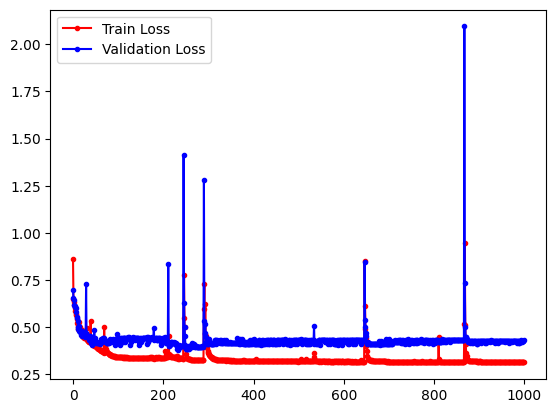

In [224]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [225]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

accuracy is 0.849
roc-auc is 0.922


> As we can see thhe result from the graph above, the result is not good because it decreased the accuracy. It is incosistent and have sudden spikes on it which suggests that there may be something wrong with either the model or the data. I suspect that it is because I changed the activation function for the final layer that it became like this.

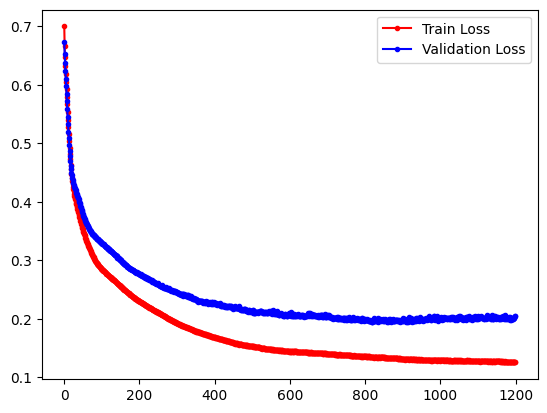

In [226]:
fig, ax = plt.subplots()
ax.plot(run_hist_4.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_4.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [227]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_4)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_4)))

accuracy is 0.931
roc-auc is 0.977


> In this attempt I tried to change the number of neurons in the existing layers. I increased the amount of neurons on the first layer while I decreased the amount of neurons to the second layer. The result yielded an 93% accuracy score which actually increased the score from the previous attempts.

In [228]:
#Trying to increase accuracy by changing the activation functions and increasing the number of neurons on both layers
model_5  = Sequential([
    Dense(128, input_shape=(8,), activation="relu"),
    Dense(64, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [235]:
model_5.compile(SGD(lr = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_5 = model_5.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
94/94 [==============================] - 1s 4ms/step - loss: 0.0642 - accuracy: 0.9790 - val_loss: 0.1894 - val_accuracy: 0.9290
Epoch 2/1500
94/94 [==============================] - 0s 3ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.1859 - val_accuracy: 0.9300
Epoch 3/1500
94/94 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.1891 - val_accuracy: 0.9290
Epoch 4/1500
94/94 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9793 - val_loss: 0.1830 - val_accuracy: 0.9300
Epoch 5/1500
94/94 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9797 - val_loss: 0.1806 - val_accuracy: 0.9330
Epoch 6/1500
94/94 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9823 - val_loss: 0.1885 - val_accuracy: 0.9310
Epoch 7/1500
94/94 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9827 - val_loss: 0.1891 - val_accuracy: 0.9300
Epoch 

In [236]:
y_pred_class_nn_5 = (model_5.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_5 = model_5.predict(X_test_norm)

32/32 [==============================] - 0s 1ms/step


In [237]:
y_pred_class_nn_5[:10]

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]], dtype=int32)

In [238]:
y_pred_prob_nn_5[:10]

array([[9.7976768e-01],
       [1.0000000e+00],
       [6.3931286e-01],
       [9.8718643e-01],
       [4.5641866e-18],
       [3.5490135e-03],
       [1.0000000e+00],
       [9.7915983e-01],
       [5.5320437e-05],
       [9.9999958e-01]], dtype=float32)

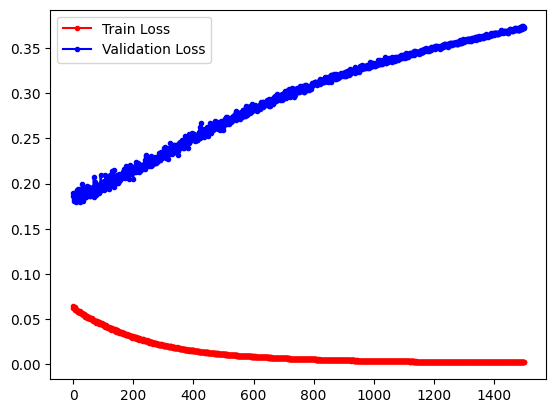

In [239]:
fig, ax = plt.subplots()
ax.plot(run_hist_5.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_5.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [240]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_5)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_5)))

accuracy is 0.924
roc-auc is 0.979


### **Interpret your result**

Here we can see that the result of the accuracy increased and reached 92%. This can be considered as a good performance of a model. However the gap between the train loss and validation loss increased. The training loss continue to decrease while the validation loss continue to increase which means that the model became too used to the training set and performs very poorly on the testing set as the epoch increases.

Colab Link: https://colab.research.google.com/drive/1k0fzv9MC1ru5-ptALWnGvb_qOXSLRLoX?usp=sharing

# Conclusion

In this activity I learned how to create artificial neural networks using keras and how to interpret the results of the model. I also learned that the accuracy of a neural network depends on its structure. Some may perform better when having a lot of layers and some performs better on less. Changing the epochs, layers, and the network structure itself can improve the results or it can worsen it. The key is to find the most optimal values to use for the model and I found out that I still need to explore that area and it goes to show that I still have a lot to learn when it comes to that.